# 迭代与groupby

In [2]:
import numpy as np
import pandas as pd

In [3]:
a=pd.DataFrame({"a":["i","j","k","i","j","k"],"b":[2,1,4,1,2,4],"c":[3,2,2,1,2,3]})

In [4]:
a

,a,b,c
0,i,2,3
1,j,1,2
2,k,4,2
3,i,1,1
4,j,2,2
5,k,4,3


### 序列与数据框的迭代

* 基于python的数据分析通常都希望通过函数完成对多个元素的操作，而避免直接通过python的循环来进行运算，这主要是考虑到python循环效率不高，通常函数底层都用c实现的循环。

* 但是有时确实要做一些非常特殊的统计必须要通过python进行循环。

In [6]:
a.a

0    i
1    j
2    k
3    i
4    j
5    k
Name: a, dtype: object

In [7]:
a.a.iteritems()

In [9]:
for i in a.a.iteritems():
    print(i[1])

i
j
k
i
j
k


In [13]:
for i in a.iteritems():
    print(i[1])

0    i
1    j
2    k
3    i
4    j
5    k
Name: a, dtype: object
0    2
1    1
2    4
3    1
4    2
5    4
Name: b, dtype: int64
0    3
1    2
2    2
3    1
4    2
5    3
Name: c, dtype: int64


In [17]:
for i in a.iterrows():
    print(i[1].loc[["a","c"]])

a    i
c    3
Name: 0, dtype: object
a    j
c    2
Name: 1, dtype: object
a    k
c    2
Name: 2, dtype: object
a    i
c    1
Name: 3, dtype: object
a    j
c    2
Name: 4, dtype: object
a    k
c    3
Name: 5, dtype: object


In [30]:
i[1].loc[["b","c"]]

b    4
c    3
Name: 5, dtype: object

### 课间作业

* 请对a进行列迭代输出所有列
* 请对a进行行迭代输出每行的b列元素与c列元素
* 请输出a.b列元素与对应a.c的元素相加大于五的行

In [18]:
a

,a,b,c
0,i,2,3
1,j,1,2
2,k,4,2
3,i,1,1
4,j,2,2
5,k,4,3


In [30]:
for i in a.iterrows():
    if i[1].loc[["b","c"]].sum()>5:
        print(i[1])

a    k
b    4
c    2
Name: 2, dtype: object
a    k
b    4
c    3
Name: 5, dtype: object


In [31]:
for i in a.iterrows():
    if i[1].b+i[1].c>5:
        print(i[1])

a    k
b    4
c    2
Name: 2, dtype: object
a    k
b    4
c    3
Name: 5, dtype: object


In [34]:
for i in a.iterrows():
    if i[1].b+i[1].c>5:
        print(i[1])

a    k
b    4
c    2
Name: 2, dtype: object
a    k
b    4
c    3
Name: 5, dtype: object


In [33]:
a[a.b+a.c>5]

,a,b,c
2,k,4,2
5,k,4,3


In [35]:
a[(a.b+a.c)>5]

,a,b,c
2,k,4,2
5,k,4,3


In [36]:
a[a.b+a.c>5]

,a,b,c
2,k,4,2
5,k,4,3


# 最有用的数据分析函数——groupby

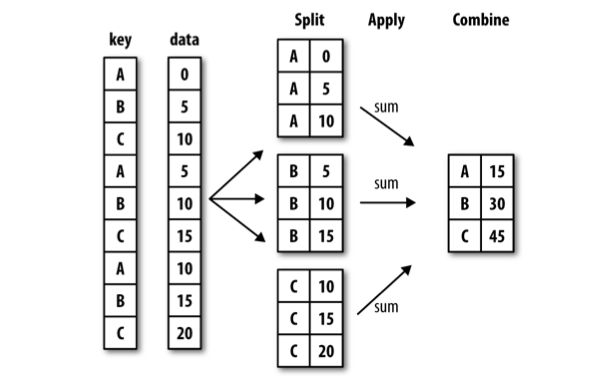

In [5]:
from IPython.display import Image
Image("timg.jpg")

In [35]:
a.groupby("a")

In [34]:
a

,a,b,c
0,i,2,3
1,j,1,2
2,k,4,2
3,i,1,1
4,j,2,2
5,k,4,3


## groupby的迭代

In [44]:
for i in a.groupby("a"):
    print(i[1])
    print()

#分组后的结果可以看成生成了一个新的数据框，原来的a列作为了第二层键，和原来的键构成了一个二层索引结构的数据框
#注意，groupby之后默认都是会按照对应列元素从小到大进行排序的，如果不希望排序需要在参数中设置sort=False

   a  b  c
0  i  2  3
3  i  1  1

   a  b  c
1  j  1  2
4  j  2  2

   a  b  c
2  k  4  2
5  k  4  3



In [45]:
#对两列数据分组
for i in a.groupby(["a","c"]):
    print(i[1])
    print()

   a  b  c
3  i  1  1

   a  b  c
0  i  2  3

   a  b  c
1  j  1  2
4  j  2  2

   a  b  c
2  k  4  2

   a  b  c
5  k  4  3



### 课堂作业

* 请对变量a的c列进行分组，并通过循环输出分组结果

In [49]:
for i in a.groupby("c"):
    print(i[1].b.sum())

1
7
6


In [55]:
a.groupby("c").sum()

,b
c,
1,1
2,7
3,6


In [60]:
a.sum()

a    ijkijk
b        14
c        13
dtype: object

* 继续上题，能否在循环中输出每一组中b列数据的和

### groupby的切片

In [54]:
a.groupby("a").get_group("k")

,a,b,c
2,k,4,2
5,k,4,3


### groupby后直接进行统计

In [18]:
for i in a.groupby("a"):
    print(i[1])
    print()

#正是因为分组后的结果本质上是一个二层索引的数据框，它继承数据框的统计函数就是理所当然的

   a  b  c
0  i  2  3
3  i  1  1

   a  b  c
1  j  1  2
4  j  2  2

   a  b  c
2  k  4  2
5  k  4  3



In [69]:
a1=a.groupby("a")

In [59]:
a.groupby("c").sum()

,b
c,
1,1
2,7
3,6


In [21]:
a.groupby("a").size()

a
i    2
j    2
k    2
dtype: int64

In [60]:
a.groupby("a").b.var()

a
i    0.5
j    0.5
k    0.0
Name: b, dtype: float64

In [96]:
#但是和在原来数据框中进行统计相区别，这里只有一种统计方式，不分组的时候是统计整列，这里把一列分成若干部分统计
a1.sum()

,b,c
a,,
i,3,4
j,3,4
k,8,5


In [11]:
a1["b"].sum()

a
i    3
j    3
k    8
Name: b, dtype: int64

In [70]:
a1.describe()

b                                               c                      \
  count mean       std  min   25%  50%   75%  max count mean       std  min   
a                                                                             
i   2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  2.0  1.414214  1.0   
j   2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  2.0  0.000000  2.0   
k   2.0  4.0  0.000000  4.0  4.00  4.0  4.00  4.0   2.0  2.5  0.707107  2.0   

                         
    25%  50%   75%  max  
a                        
i  1.50  2.0  2.50  3.0  
j  2.00  2.0  2.00  2.0  
k  2.25  2.5  2.75  3.0

In [25]:
a1.agg(["sum","mean"])

b        c     
  sum mean sum mean
a                  
i   3  1.5   4  2.0
j   3  1.5   4  2.0
k   8  4.0   5  2.5

### 课堂作业

* 统计变量a的a列分组下所有列元素的均值，方差，中位数

b                c            
  mean  var median mean  var median
a                                  
i  1.5  0.5    1.5  2.0  2.0    2.0
j  1.5  0.5    1.5  2.0  0.0    2.0
k  4.0  0.0    4.0  2.5  0.5    2.5

* 统计变量a的a列分组下c列元素的和，标准差，最大值

In [62]:
a.groupby("a").c.agg(["max","sum","std"])

,max,sum,std
a,,,
i,3,4,1.414214
j,2,4,0.000000
k,3,5,0.707107


### 条件与分组

In [71]:
a

,a,b,c
0,i,2,3
1,j,1,2
2,k,4,2
3,i,1,1
4,j,2,2
5,k,4,3


In [72]:
a[a.b>1]

,a,b,c
0,i,2,3
2,k,4,2
4,j,2,2
5,k,4,3


* 先条件再分组

In [73]:
for i in a[a.b>1].groupby("a"):
    print(i[1])

   a  b  c
0  i  2  3
   a  b  c
4  j  2  2
   a  b  c
2  k  4  2
5  k  4  3


* 先分组后条件

In [103]:
for i in a.groupby("a"):
    print(i[1])
    print()

   a  b  c
0  i  2  3
3  i  1  1

   a  b  c
1  j  1  2
4  j  2  2

   a  b  c
2  k  4  2
5  k  4  3



In [57]:
#这里的x为已经groupby之后的数据
def gl(x):
    return x["b"].sum()>3

In [58]:
a.groupby("a").filter(gl)
#最终结果是满足条件的原始记录

,a,b,c
2,k,4,2
5,k,4,3


## 课间题

* 请过滤出所有c列中值为偶数的记录(这里不用filter，直接用以前的方法过滤就行)

,a,b,c
1,j,1,2
2,k,4,2
4,j,2,2


* 请过滤出c分组内记录行数大于等于2的数据

,a,b,c
0,i,2,3
1,j,1,2
2,k,4,2
4,j,2,2
5,k,4,3


In [44]:
a.b.count()

6

In [81]:
a.b.count()

6

In [115]:
for i in a.groupby("c"):
    print(i[1])

   a  b  c
3  i  1  1
   a  b  c
1  j  1  2
2  k  4  2
4  j  2  2
   a  b  c
0  i  2  3
5  k  4  3


In [68]:
a.groupby("c")["b"].size()

c
1    1
2    3
3    2
Name: b, dtype: int64

### 作业

1，请读入数据：t_alibaba_data3.txt，并输出前五行

In [4]:
r1=pd.read_csv(r"D:\t_alibaba_data3.txt",names=["user","brand","behavr","date"],sep="\t")
r1.head()

,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


2，请用groupby统计每个品牌的总记录数

In [5]:
r1.groupby("brand").size()

brand
11         4
15         6
18         1
19         3
20         5
22        34
23         1
26        10
27         5
29        24
33         1
38         1
39         3
43         9
45         1
53         2
57        11
58         1
62        13
72         4
83        18
90         3
91         3
103        4
104        1
111        4
116        1
119        2
120        9
121        1
        ... 
29463      2
29464     29
29465     68
29472     21
29473    100
29474     10
29475      1
29477      1
29486      1
29487      1
29488      1
29490     73
29491      1
29493      3
29497     84
29501      8
29502      1
29504      5
29505      8
29509      1
29524      3
29528     10
29529      3
29531      1
29538      3
29539     10
29541     16
29547    369
29551     11
29552      2
Length: 9531, dtype: int64

brand
11         4
15         6
18         1
19         3
20         5
22        34
23         1
26        10
27         5
29        24
33         1
38         1
39         3
43         9
45         1
53         2
57        11
58         1
62        13
72         4
83        18
90         3
91         3
103        4
104        1
111        4
116        1
119        2
120        9
121        1
        ... 
29463      2
29464     29
29465     68
29472     21
29473    100
29474     10
29475      1
29477      1
29486      1
29487      1
29488      1
29490     73
29491      1
29493      3
29497     84
29501      8
29502      1
29504      5
29505      8
29509      1
29524      3
29528     10
29529      3
29531      1
29538      3
29539     10
29541     16
29547    369
29551     11
29552      2
Length: 9531, dtype: int64

3， 请用groupby统计每个品牌的总浏览数

In [7]:
r1[r1.behavr==0].groupby("brand").size()

brand
11         4
15         6
18         1
19         2
20         5
22        33
23         1
26         9
27         4
29        21
33         1
38         1
39         3
43         8
45         1
53         2
57         9
58         1
62        12
72         4
83         8
90         3
91         3
103        4
104        1
111        4
116        1
119        2
120        9
121        1
        ... 
29463      2
29464     29
29465     63
29472     19
29473     98
29474     10
29475      1
29477      1
29486      1
29487      1
29488      1
29490     71
29491      1
29493      3
29497     84
29501      8
29502      1
29504      5
29505      7
29509      1
29524      3
29528     10
29529      3
29531      1
29538      3
29539      9
29541     16
29547    357
29551      9
29552      2
Length: 9511, dtype: int64

5， 请把所有购买次数大于10的用户都挑选出来

In [9]:
p2=r1[r1.behavr==1].groupby("user").size()

In [11]:
p2[p2>10]

user
83250       12
154500      14
200250      12
267250      18
380000      12
434750      18
439000      39
452750      20
472000      24
567250      12
599750      11
691500      24
711500      37
731750      11
776750      23
791500      12
832250      11
835000      23
887750      11
892500      21
1063000     11
1074750     22
1086750     16
1118250     23
1140750     18
1173500     24
1189000     19
1194750     44
1244250     14
1324500     23
            ..
10642000    25
10696000    13
10773000    15
11121500    12
11158000    19
11313000    15
11321750    21
11440500    13
11493000    18
11564250    18
11625250    18
11711250    16
11730000    18
11874000    12
11947000    22
11949750    12
11972750    17
12004000    12
12016750    20
12028500    13
12154500    38
12173500    54
12215000    12
12229000    14
12234750    14
12239250    15
12331000    13
12371000    21
12377250    22
12417500    26
Length: 232, dtype: int64

user
83250       12
154500      14
200250      12
267250      18
380000      12
434750      18
439000      39
452750      20
472000      24
567250      12
599750      11
691500      24
711500      37
731750      11
776750      23
791500      12
832250      11
835000      23
887750      11
892500      21
1063000     11
1074750     22
1086750     16
1118250     23
1140750     18
1173500     24
1189000     19
1194750     44
1244250     14
1324500     23
            ..
10642000    25
10696000    13
10773000    15
11121500    12
11158000    19
11313000    15
11321750    21
11440500    13
11493000    18
11564250    18
11625250    18
11711250    16
11730000    18
11874000    12
11947000    22
11949750    12
11972750    17
12004000    12
12016750    20
12028500    13
12154500    38
12173500    54
12215000    12
12229000    14
12234750    14
12239250    15
12331000    13
12371000    21
12377250    22
12417500    26
Length: 232, dtype: int64

6，求出各个品牌的四种行为的次数

In [12]:
r1.groupby(["brand","behavr"]).size()

brand  behavr
11     0           4
15     0           6
18     0           1
19     0           2
       1           1
20     0           5
22     0          33
       1           1
23     0           1
26     0           9
       2           1
27     0           4
       2           1
29     0          21
       1           3
33     0           1
38     0           1
39     0           3
43     0           8
       1           1
45     0           1
53     0           2
57     0           9
       1           1
       3           1
58     0           1
62     0          12
       1           1
72     0           4
83     0           8
                ... 
29486  0           1
29487  0           1
29488  0           1
29490  0          71
       1           2
29491  0           1
29493  0           3
29497  0          84
29501  0           8
29502  0           1
29504  0           5
29505  0           7
       1           1
29509  0           1
29524  0           3
29528  0          10

brand  behavr
11     0           4
15     0           6
18     0           1
19     0           2
       1           1
20     0           5
22     0          33
       1           1
23     0           1
26     0           9
       2           1
27     0           4
       2           1
29     0          21
       1           3
33     0           1
38     0           1
39     0           3
43     0           8
       1           1
45     0           1
53     0           2
57     0           9
       1           1
       3           1
58     0           1
62     0          12
       1           1
72     0           4
83     0           8
                ... 
29486  0           1
29487  0           1
29488  0           1
29490  0          71
       1           2
29491  0           1
29493  0           3
29497  0          84
29501  0           8
29502  0           1
29504  0           5
29505  0           7
       1           1
29509  0           1
29524  0           3
29528  0          10